# Isotropic Deep learning demo

In [1]:
import torch
from torch import nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

Isotropic Tanh
$$
    f(\mathbf{x}) = \dfrac{\tanh(||\mathbf{x}||) \;\mathbf{x}}{||\mathbf{x}||}
$$

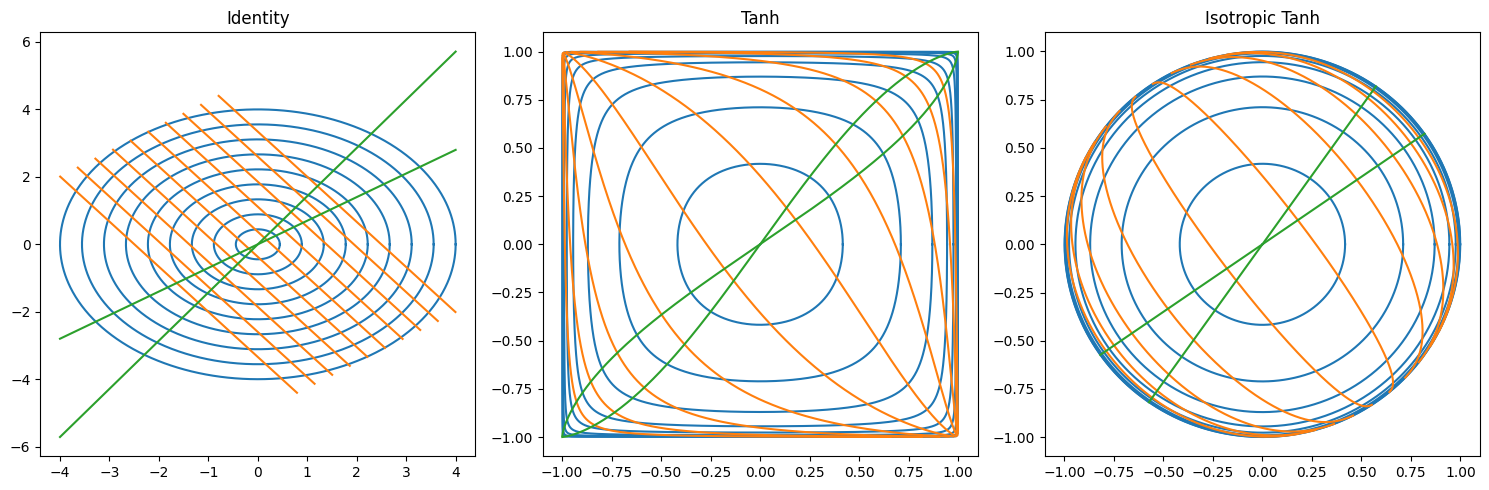

In [ ]:
x = np.linspace(0, 2*np.pi, 1000).reshape(-1, 1)
t = np.linspace(-4, 4, 1000).reshape(-1, 1)

a_scale = 4
m_angle = 2.5

a = a_scale * np.linspace(0.0001, 1, 10)

m_grad = 0.7

circles = lambda x, a, f: (f(np.cos(x)*a, np.sin(x)*a), f(np.sin(x)*a, np.cos(x)*a))

lines = lambda t, m_angle, a, a_scale, f: (
    f(t * np.sin(m_angle) + (a - a_scale/2) * np.cos(m_angle), 
      t * np.cos(m_angle) - (a - a_scale/2) * np.sin(m_angle)), 
    f(t * np.cos(m_angle) - (a - a_scale/2) * np.sin(m_angle), 
      t * np.sin(m_angle) + (a - a_scale/2) * np.cos(m_angle))
      )

origin_lines = lambda t, m_grad, f: (f(t, m_grad*t), f(m_grad*t, t))


identity = lambda x1, _: x1
tanh = lambda x1, _: np.tanh(x1)
iso_tanh = lambda x1, x2: np.tanh((x1**2 + x2**2)**.5) * x1 / (x1**2 + x2**2)**.5

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5)) #, sharex=True, sharey=True)

c1, c2 = circles(x, a, identity)
l1, l2 = lines(t, m_angle, a, a_scale, identity)
ol1, ol2 = origin_lines(t, m_grad, identity)
ol1_inv, ol2_inv = origin_lines(t, 1/m_grad, identity)

ax1.plot(c1, c2, color='C0')
ax1.plot(l1, l2, color='C1')
ax1.plot(ol1, ol2, color='C2')
ax1.plot(ol1_inv, ol2_inv, color='C2')
ax1.set_title('Identity')

c1, c2 = circles(x, a, tanh)
l1, l2 = lines(t, m_angle, a, a_scale, tanh)
ol1, ol2 = origin_lines(t, m_grad, tanh)
ol1_inv, ol2_inv = origin_lines(t, 1/m_grad, tanh)

ax2.plot(c1, c2, color='C0')
ax2.plot(l1, l2, color='C1')
ax2.plot(ol1, ol2, color='C2')
ax2.plot(ol1_inv, ol2_inv, color='C2')
ax2.set_title('Tanh')

c1, c2 = circles(x, a, iso_tanh)
l1, l2 = lines(t, m_angle, a, a_scale, iso_tanh)
ol1, ol2 = origin_lines(t, m_grad, iso_tanh)
ol1_inv, ol2_inv = origin_lines(t, 1/m_grad, iso_tanh)

ax3.plot(c1, c2, color='C0')
ax3.plot(l1, l2, color='C1')
ax3.plot(ol1, ol2, color='C2')
ax3.plot(ol1_inv, ol2_inv, color='C2')
ax3.set_title('Isotropic Tanh')

plt.tight_layout()
plt.show()

Isotropic Relu
$$
    f(\mathbf{x}) = \dfrac{\text{ReLU}(||\mathbf{x}|| - r_0) \;\mathbf{x}}{||\mathbf{x}||}
$$
where $r_0 \in \mathbb{R}$ is (learnable) threshold

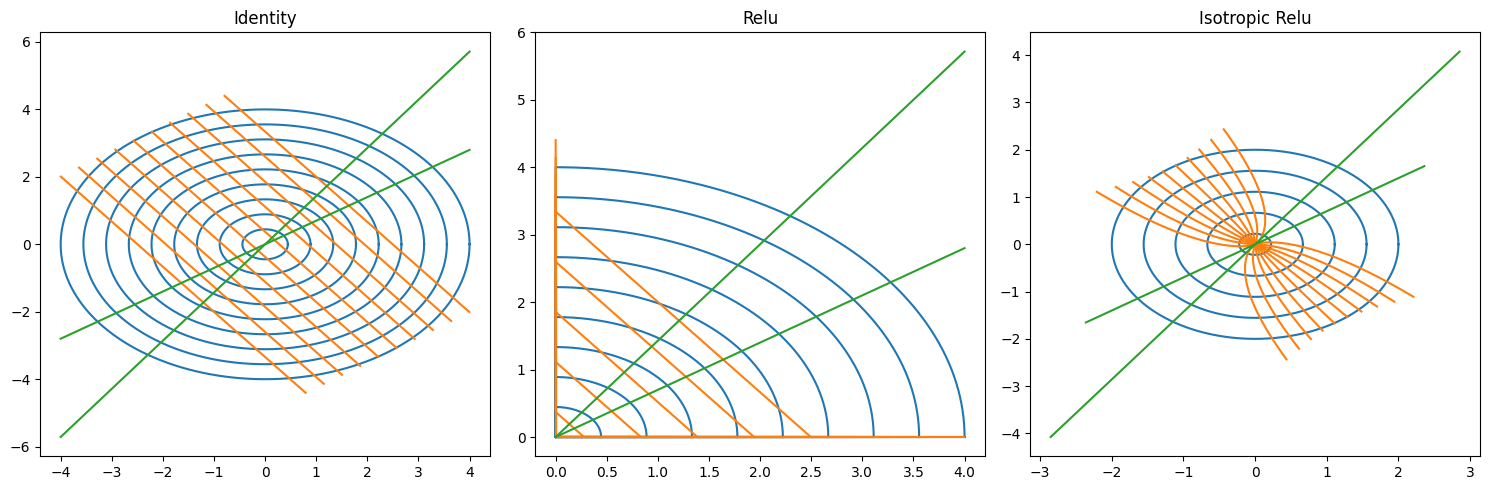

In [ ]:
x = np.linspace(0, 2*np.pi, 1000).reshape(-1, 1)
t = np.linspace(-4, 4, 1000).reshape(-1, 1)

a_scale = 4
m_angle = 2.5

a = a_scale * np.linspace(0.0001, 1, 10)

m_grad = 0.7

circles = lambda x, a, f: (f(np.cos(x)*a, np.sin(x)*a), f(np.sin(x)*a, np.cos(x)*a))

lines = lambda t, m_angle, a, a_scale, f: (
    f(t * np.sin(m_angle) + (a - a_scale/2) * np.cos(m_angle), 
      t * np.cos(m_angle) - (a - a_scale/2) * np.sin(m_angle)), 
    f(t * np.cos(m_angle) - (a - a_scale/2) * np.sin(m_angle), 
      t * np.sin(m_angle) + (a - a_scale/2) * np.cos(m_angle))
      )

origin_lines = lambda t, m_grad, f: (f(t, m_grad*t), f(m_grad*t, t))


identity = lambda x1, _: x1
relu = lambda x1, _: np.maximum(x1, 0)
r0 = 2
relu = lambda x1, x2: np.maximum(0, (x1**2 + x2**2)**.5 - r0) * x1 / (x1**2 + x2**2)**.5

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5)) #, sharex=True, sharey=True)

c1, c2 = circles(x, a, identity)
l1, l2 = lines(t, m_angle, a, a_scale, identity)
ol1, ol2 = origin_lines(t, m_grad, identity)
ol1_inv, ol2_inv = origin_lines(t, 1/m_grad, identity)

ax1.plot(c1, c2, color='C0')
ax1.plot(l1, l2, color='C1')
ax1.plot(ol1, ol2, color='C2')
ax1.plot(ol1_inv, ol2_inv, color='C2')
ax1.set_title('Identity')

c1, c2 = circles(x, a, relu)
l1, l2 = lines(t, m_angle, a, a_scale, relu)
ol1, ol2 = origin_lines(t, m_grad, relu)
ol1_inv, ol2_inv = origin_lines(t, 1/m_grad, relu)

ax2.plot(c1, c2, color='C0')
ax2.plot(l1, l2, color='C1')
ax2.plot(ol1, ol2, color='C2')
ax2.plot(ol1_inv, ol2_inv, color='C2')
ax2.set_title('Relu')

c1, c2 = circles(x, a, relu)
l1, l2 = lines(t, m_angle, a, a_scale, relu)
ol1, ol2 = origin_lines(t, m_grad, iso_relu)
ol1_inv, ol2_inv = origin_lines(t, 1/m_grad, iso_relu)

ax3.plot(c1, c2, color='C0')
ax3.plot(l1, l2, color='C1')
ax3.plot(ol1, ol2, color='C2')
ax3.plot(ol1_inv, ol2_inv, color='C2')
ax3.set_title('Isotropic Relu')

plt.tight_layout()
plt.show()

## Equivariance to rotations in Isotropic activation functions

For any $R \in O(n)$, i.e., for any $n \times n$ rotation matrix, it holds that the isotropic activation function $f(\mathbf{x})$ is equivariant with respect to rotations
$$
    f(R \mathbf{x}) = R f(\mathbf{x})
$$
This means that the activation of a rotated vector $f(R \mathbf{x})$ is equivalent up to some constant scalar to the rotated activation vector $R f(\mathbf{x})$. 

In [306]:
R = lambda theta: np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)],
])

thetas = np.linspace(0, 2*np.pi, 100)

x = np.array([10, 0])

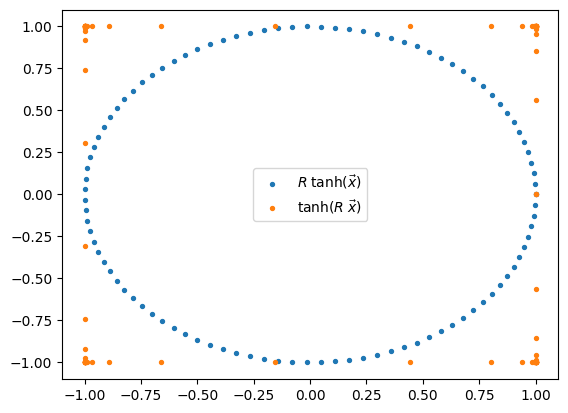

In [307]:
z1 = (np.tanh(x) @ R(thetas))
z2 = (np.tanh(x @ R(thetas)))

m = 100

plt.scatter(z1[0, :m], z1[1, :m], s=8, label=r'$R \; \text{tanh}(\vec{x})$')
plt.scatter(z2[0, :m], z2[1, :m], s=8, label=r'$\text{tanh}(R\;  \vec{x})$')
plt.legend()

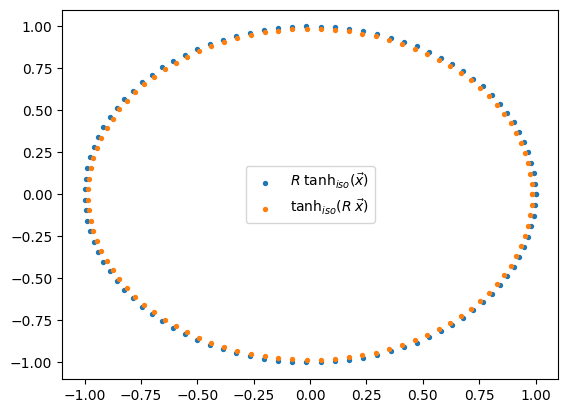

In [308]:
iso_tanh = lambda x: np.tanh(np.linalg.norm(x, ord=2)) * x/np.linalg.norm(x, ord=2)

z1 = (iso_tanh(x) @ R(thetas))
z2 = (7*iso_tanh(x @ R(thetas)))

m = 100

plt.scatter(z1[0, :m], z1[1, :m], s=8, label=r'$R \; \text{tanh}_{iso}(\vec{x})$')
plt.scatter(z2[0, :m], z2[1, :m], s=8, label=r'$\text{tanh}_{iso}(R\;  \vec{x})$')
plt.legend()

## Equivariance to permutations in Anisotropic activation functions

For any $P \in S_n$, i.e., for any $n \times n$ permutation matrix, it holds that the anisotropic activation function $f(\mathbf{x})$ is equivariant with respect to permutations in the standard basis 
$$
    f(P \mathbf{x}) = P f(\mathbf{x})
$$
When $\mathbf{x} \in \mathbb{R}^2$, we get 
$$
    \sum_{i=1}^2 f(\mathbf{x} \cdot \vec{e}_i) \vec{e}_i = f(\mathbf{x} \cdot \vec{e}_1) \vec{e}_1 + f(\mathbf{x} \cdot \vec{e}_2) \vec{e}_2 = f(\mathbf{x} \cdot \vec{e}_2) \vec{e}_2 + f(\mathbf{x} \cdot \vec{e}_1) \vec{e}_1
$$

In [396]:
P = lambda n: np.identity(n)[:, np.random.permutation(np.arange(n))]

In [ ]:
x = np.array([2, 5, -1])
n = x.shape[0]

Pn = P(n)

z1 = Pn @ np.tanh(x)
z2 = np.tanh(Pn @ x)

z1, z2

(array([ 0.96402758, -0.76159416,  0.9999092 ]),
 array([ 0.96402758, -0.76159416,  0.9999092 ]))

In [398]:
x = np.array([2, 5, -1])
n = x.shape[0]

Pn = P(n)

z1 = Pn @ iso_tanh(x)
z2 = iso_tanh(Pn @ x)

z1, z2

(array([-0.1825678 ,  0.36513561,  0.91283902]),
 array([-0.1825678 ,  0.36513561,  0.91283902]))

## Toy Neural Network

In [ ]:
class IsoNN(nn.Module):
    def __init__(self, d, out, iso=True, act='tanh'):
        super().__init__()
        self.act = act
        self.iso = iso
        self.fc1 = nn.LazyLinear(d)
        self.fc2 = nn.LazyLinear(out)
        if self.act == 'relu' and self.iso:
            self.r0 = nn.Parameter(torch.randn(1))

        self.z = torch.tensor(0)

    def forward(self, x):
        # x: (batch_size, dim)
        x = self.fc1(x)

        match (self.act, self.iso):
            case ('tanh', True):
                # isotropic tanh f(||x||) * x/||x||
                x_norm = torch.norm(x, p=2, dim=1, keepdim=True)
                self.z = F.tanh(x_norm) * (x / x_norm)
            case ('tanh', False):
                self.z = F.tanh(x)
            case ('relu', True):
                # isotropic relu f(||x|| - r0) * x/||x||
                x_norm = torch.norm(x, p=2, dim=1, keepdim=True)
                self.z = F.relu(x_norm - self.r0) * (x / x_norm)
            case ('relu', False):
                self.z = F.relu(x)
                
        return self.fc2(self.z)

x = torch.randn(32, 2)
net = IsoNN(d=10, out=3, iso=True, act='relu')
net(x).shape

c:\Users\janba\anaconda3\envs\workspace_jan\Lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


torch.Size([32, 3])

## Binary Classification

In [323]:
def animate_binary_manifold(path, losses, X, y, xx, yy, D_preds, D_z, y_preds, y_z):
    from matplotlib import animation

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    def animate(i):

        ax1.clear()
        ax1.set_title(f'Loss curve, epoch={i}')
        ax1.plot(losses[:i])

        ax2.clear()
        ax2.set_title(f'Decision boundary')
        ax2.contourf(xx, yy, D_preds[i].reshape(xx.shape), alpha=0.5, levels=50, cmap='coolwarm')
        ax2.scatter(X[:, 0], X[:, 1], c=y, s=8, cmap='coolwarm')
        
        ax3.clear()
        ax3.set_title(f'Manifold')
        ax3.scatter(D_z[i][:, 0], D_z[i][:, 1], s=5, c=D_preds[i], cmap='coolwarm', alpha=0.1)
        ax3.scatter(y_z[i][:, 0], y_z[i][:, 1], s=8, c=y_preds[i], cmap='coolwarm')
        
        return 

    anim = animation.FuncAnimation(fig, animate, frames=len(y_preds), repeat=False, interval=1)
    anim.save(path, writer=animation.FFMpegWriter(fps=10))

def train_binary_network(iso, act, X, y, D, lr=0.01, epochs=500):

    losses = []

    D_z, D_preds = [], []
    y_z, y_preds = [], []

    loss_fn = nn.BCEWithLogitsLoss()
    net = IsoNN(d=2, out=1, iso=iso, act=act)
    optim = torch.optim.AdamW(net.parameters(), lr=lr)

    for i in range(epochs):

        y_hat = net(X)
        y_preds.append(F.sigmoid(y_hat).detach().cpu().numpy())
        y_z.append(net.z.detach().cpu().numpy())

        y_D = net(D)
        D_preds.append(F.sigmoid(y_D).detach().cpu().numpy())
        D_z.append(net.z.detach().cpu().numpy())

        loss = loss_fn(y_hat, y)

        optim.zero_grad()

        loss.backward()

        optim.step()

        losses.append(loss.item())

    return net, losses, D_z, D_preds, y_z, y_preds

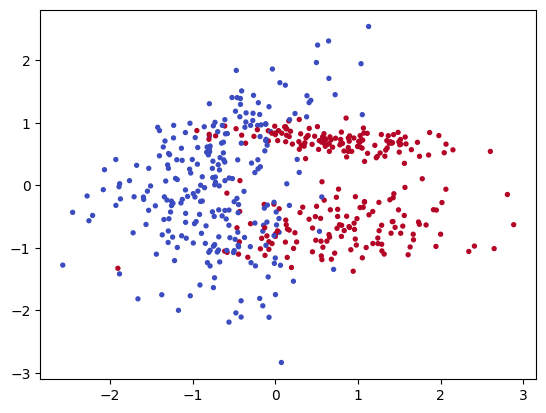

In [324]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_classes=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=2,
    class_sep=0.7,
    random_state=10
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=8, cmap='coolwarm')

In [325]:
# from sklearn.datasets import make_circles

# X, y = make_circles(
#     n_samples=500,
#     noise=0.2,
#     factor=0.3,
#     random_state=42
# )

# plt.scatter(X[:, 0], X[:, 1], c=y, s=8, cmap='coolwarm')

In [326]:
minx, maxx = X.min()-2, X.max()+2

r = np.linspace(minx, maxx, 200)
xx, yy = np.meshgrid(r, r)
D = np.vstack([xx.ravel(), yy.ravel()]).T

_D = torch.from_numpy(D).to(torch.float)

_X = torch.from_numpy(X).to(torch.float)
_y = torch.from_numpy(y)[..., None].to(torch.float)

D.shape

(40000, 2)

### Tanh networks

#### Isotropic Tanh network

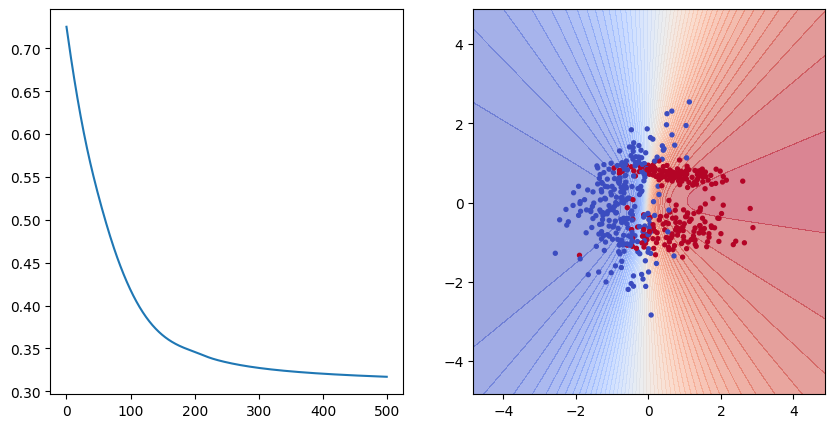

In [ ]:
net, iso_tanh_losses, iso_tanh_D_z, iso_tanh_D_preds, iso_tanh_y_z, iso_tanh_y_preds = train_binary_network(
    iso=True,
    act='tanh',
    X=_X,
    y=_y,
    D=_D
)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(iso_tanh_losses)
axes[1].contourf(xx, yy, iso_tanh_D_preds[-1].reshape(xx.shape), alpha=0.5, levels=50, cmap='coolwarm')
axes[1].scatter(X[:, 0], X[:, 1], c=y, s=8, cmap='coolwarm')

#### Anisotropic Tanh network 

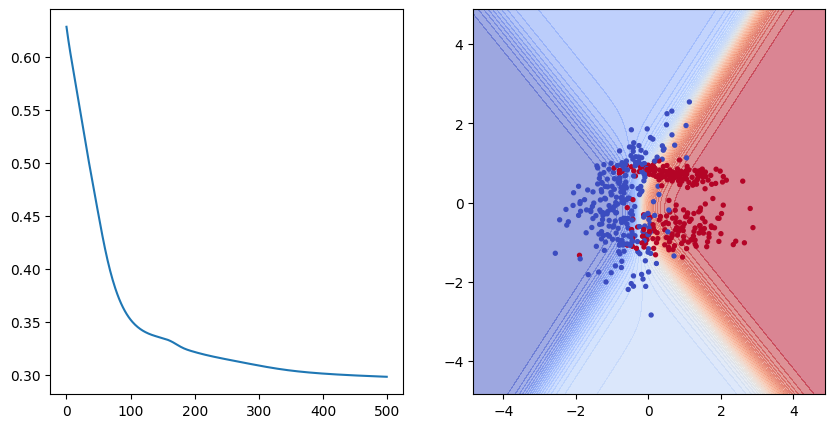

In [328]:
net, tanh_losses, tanh_D_z, tanh_D_preds,tanh_y_z, tanh_y_preds = train_binary_network(
    iso=False,
    act='tanh',
    X=_X,
    y=_y,
    D=_D
)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(tanh_losses)
axes[1].contourf(xx, yy, tanh_D_preds[-1].reshape(xx.shape), alpha=0.5, levels=50, cmap='coolwarm')
axes[1].scatter(X[:, 0], X[:, 1], c=y, s=8, cmap='coolwarm')

#### Comparison of latent spaces

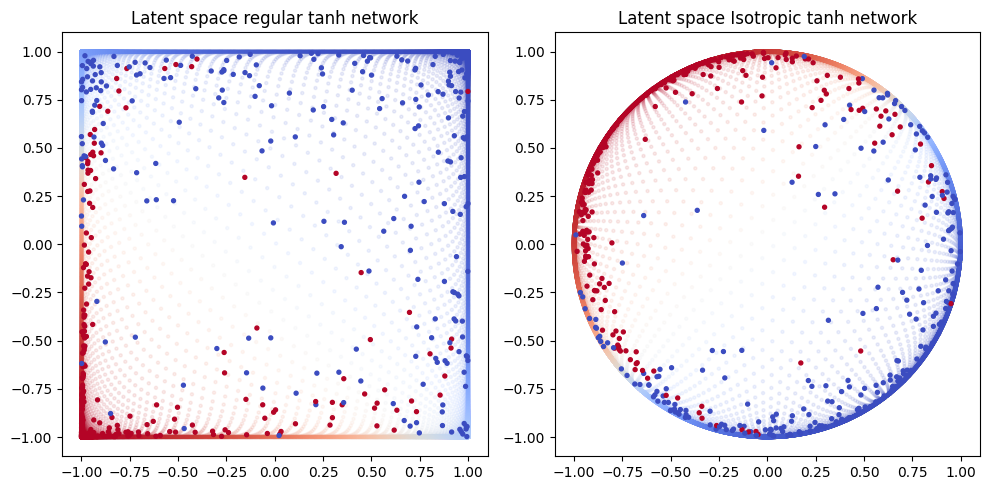

In [333]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(tanh_D_z[-1][:, 0], tanh_D_z[-1][:, 1], s=5, c=tanh_D_preds[-1], alpha=0.1, cmap='coolwarm')
ax1.scatter(tanh_y_z[-1][:, 0], tanh_y_z[-1][:, 1], s=8, c=y, cmap='coolwarm')
ax1.set_title('Latent space regular tanh network')

ax2.scatter(iso_tanh_D_z[-1][:, 0], iso_tanh_D_z[-1][:, 1], s=5, c=iso_tanh_D_preds[-1], alpha=0.1, cmap='coolwarm')
ax2.scatter(iso_tanh_y_z[-1][:, 0], iso_tanh_y_z[-1][:, 1], s=8, c=y, cmap='coolwarm')
ax2.set_title('Latent space Isotropic tanh network')

plt.tight_layout()

#### Animating learning process

##### Isotropic

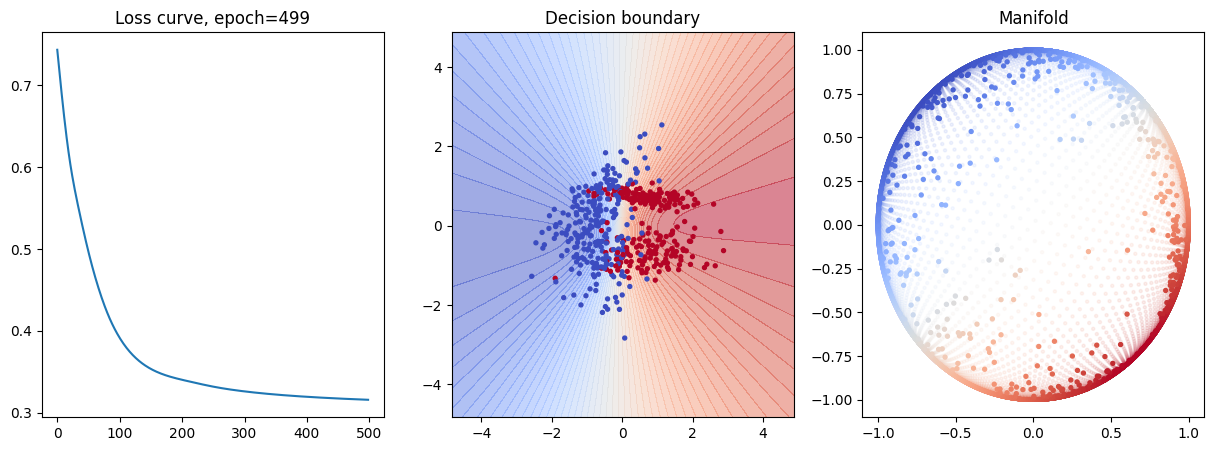

In [ ]:
animate_binary_manifold(
    path='../training_animations/iso_tanh_training_animation.mp4',
    losses=iso_tanh_losses,
    X=X,
    y=y,
    xx=xx,
    yy=yy,
    D_preds=iso_tanh_D_preds,
    D_z=iso_tanh_D_z,
    y_preds=iso_tanh_y_preds,
    y_z=iso_tanh_y_z
)

##### Anisotropic

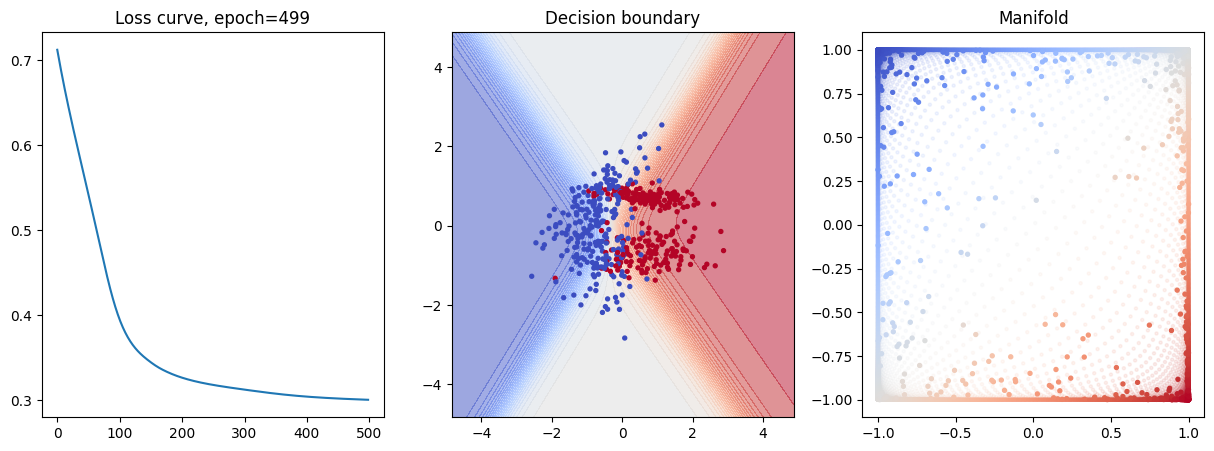

In [ ]:
animate_binary_manifold(
    path='../training_animations/tanh_training_animation.mp4',
    losses=tanh_losses,
    X=X,
    y=y,
    xx=xx,
    yy=yy,
    D_preds=tanh_D_preds,
    D_z=tanh_D_z,
    y_preds=tanh_y_preds,
    y_z=tanh_y_z
)

### Relu networks

#### Isotropic ReLU network

c:\Users\janba\anaconda3\envs\workspace_jan\Lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


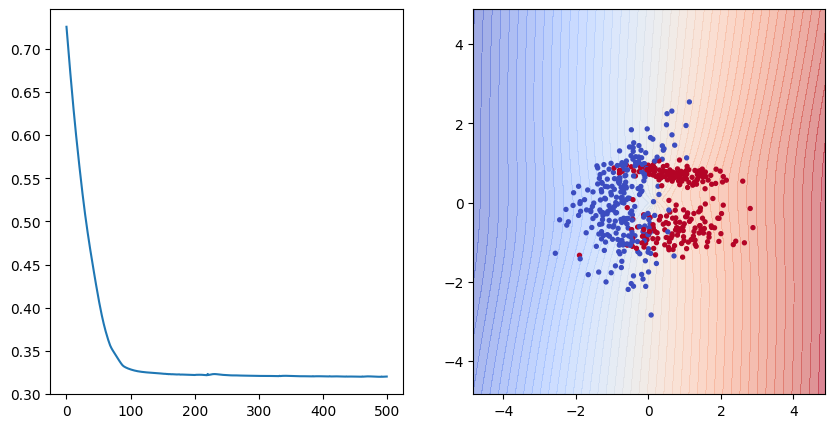

In [ ]:
net, iso_relu_losses, iso_relu_D_z, iso_relu_D_preds, iso_relu_y_z, iso_relu_y_preds = train_binary_network(
    iso=True,
    act='relu',
    X=_X,
    y=_y,
    D=_D
)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(iso_relu_losses)
axes[1].contourf(xx, yy, iso_relu_D_preds[-1].reshape(xx.shape), alpha=0.5, levels=50, cmap='coolwarm')
axes[1].scatter(X[:, 0], X[:, 1], c=y, s=8, cmap='coolwarm')

#### Anisotropic ReLU network

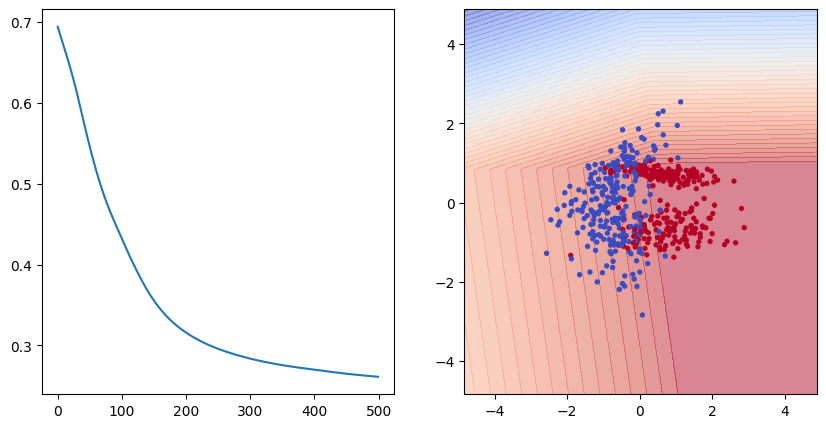

In [ ]:
net, relu_losses, relu_D_z, relu_D_preds, relu_y_z, relu_y_preds = train_binary_network(
    iso=False,
    act='relu',
    X=_X,
    y=_y,
    D=_D
)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(relu_losses)
axes[1].contourf(xx, yy, relu_D_preds[-1].reshape(xx.shape), alpha=0.5, levels=50, cmap='coolwarm')
axes[1].scatter(X[:, 0], X[:, 1], c=y, s=8, cmap='coolwarm')

#### Comparison of latent spaces

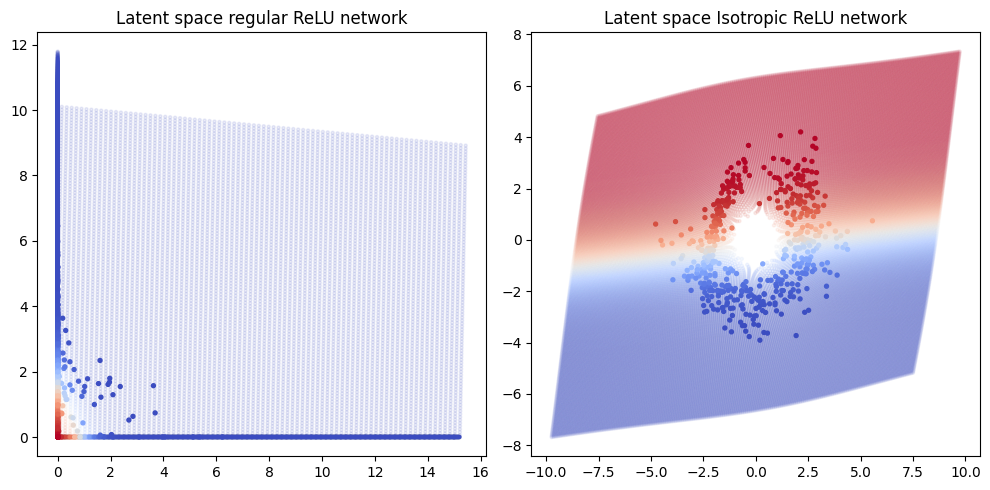

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(relu_D_z[-1][:, 0], relu_D_z[-1][:, 1], s=5, c=relu_D_preds[-1], alpha=0.1, cmap='coolwarm')
ax1.scatter(relu_y_z[-1][:, 0], relu_y_z[-1][:, 1], s=8, c=y, cmap='coolwarm')
ax1.set_title('Latent space regular ReLU network')

ax2.scatter(iso_relu_D_z[-1][:, 0], iso_relu_D_z[-1][:, 1], s=5, c=iso_relu_D_preds[-1], alpha=0.1, cmap='coolwarm')
ax2.scatter(iso_relu_y_z[-1][:, 0], iso_relu_y_z[-1][:, 1], s=8, c=y, cmap='coolwarm')
ax2.set_title('Latent space Isotropic ReLU network')

plt.tight_layout()

#### Animating learning process

##### Isotropic

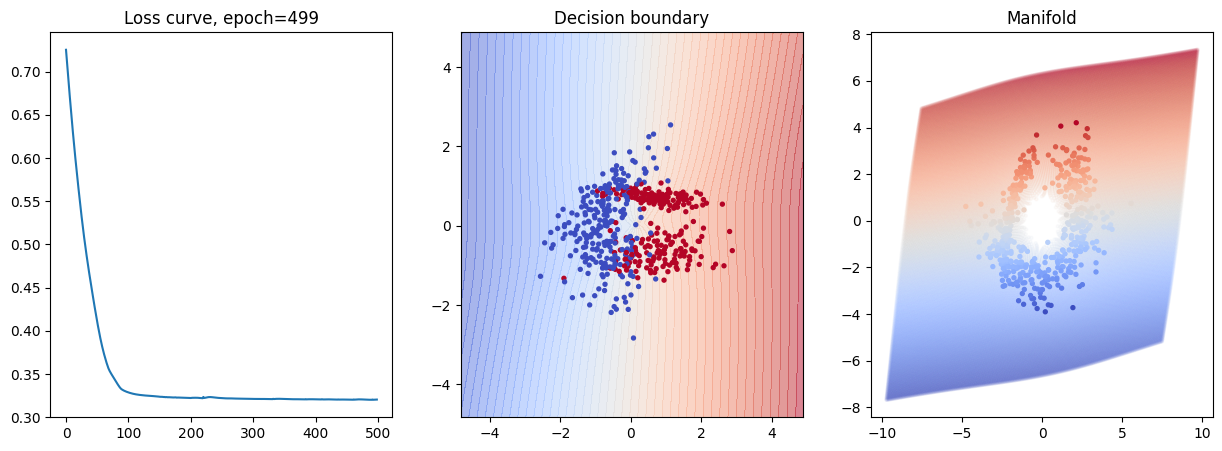

In [ ]:
animate_binary_manifold(
    path='../training_animations/iso_relu_training_animation.mp4',
    losses=iso_relu_losses,
    X=X,
    y=y,
    xx=xx,
    yy=yy,
    D_preds=iso_relu_D_preds,
    D_z=iso_relu_D_z,
    y_preds=iso_relu_y_preds,
    y_z=iso_relu_y_z
)

##### Anisotropic

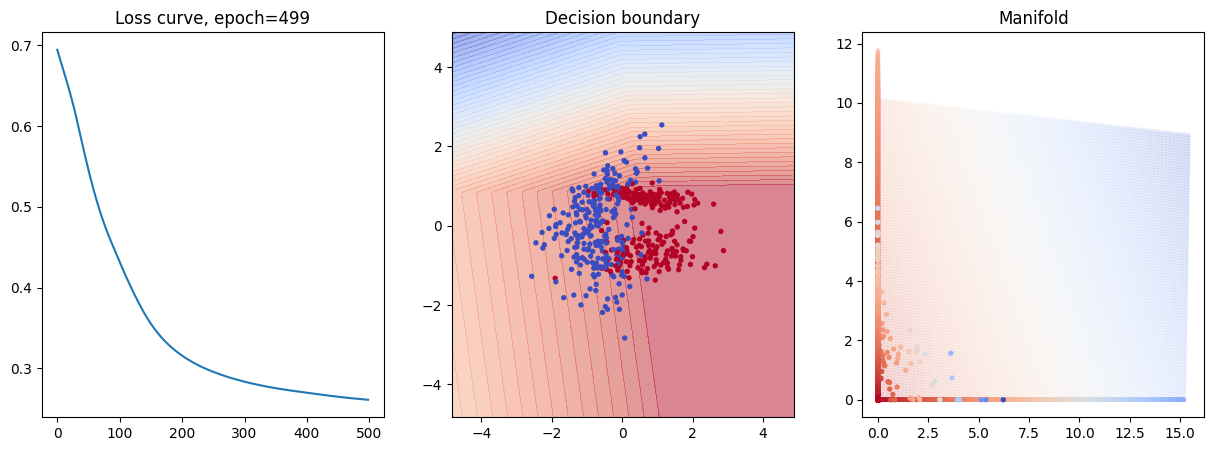

In [ ]:
animate_binary_manifold(
    path='../training_animations/relu_training_animation.mp4',
    losses=relu_losses,
    X=X,
    y=y,
    xx=xx,
    yy=yy,
    D_preds=relu_D_preds,
    D_z=relu_D_z,
    y_preds=relu_y_preds,
    y_z=relu_y_z
)

## Multi-class Classification

In [ ]:
def animate_multiclass_manifold(path, losses, X, y, xx, yy, D_preds, D_z, y_preds, y_z, cmap):
    from matplotlib import animation

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    fig.tight_layout()

    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    
    ax2.set_xlabel(r'$x_1$')
    ax2.set_xlabel(r'$x_2$')

    ax3.set_xlabel(r'$z_1$')
    ax3.set_xlabel(r'$z_2$')

    def animate(i):

        ax1.clear()
        ax1.set_title(f'Loss curve, epoch={i}')
        ax1.plot(losses[:i])

        ax2.clear()
        
        rgb_image = D_preds[i].reshape(xx.shape[0], xx.shape[1], 3)
        ax2.imshow(rgb_image, extent=[xx.min(), xx.max(), yy.min(), yy.max()], origin='lower', alpha=0.5)
        ax2.scatter(X[:, 0], X[:, 1], c=y, s=8, cmap=cmap)
        ax2.set_title(f'Decision boundary')
        
        ax3.clear()
        ax3.set_title(f'Manifold')
        ax3.scatter(D_z[i][:, 0], D_z[i][:, 1], s=5, c=D_preds[i], alpha=0.1)
        ax3.scatter(y_z[i][:, 0], y_z[i][:, 1], s=8, c=y, cmap=cmap)
        
        return 

    # anim = animation.FuncAnimation(fig, animate, frames=20, repeat=False, interval=1)
    anim = animation.FuncAnimation(fig, animate, frames=len(y_preds), repeat=False, interval=1)
    anim.save(path, writer=animation.FFMpegWriter(fps=10))

def train_network(iso, act, X, y, D, lr=0.01, epochs=500):

    losses = []

    D_z, D_preds = [], []
    y_z, y_preds = [], []

    loss_fn = nn.CrossEntropyLoss()
    net = IsoNN(d=2, out=3, iso=iso, act=act)
    optim = torch.optim.AdamW(net.parameters(), lr=lr)

    for i in range(epochs):

        y_hat = net(X)
        y_preds.append(F.softmax(y_hat, dim=1).detach().cpu().numpy())
        y_z.append(net.z.detach().cpu().numpy())

        y_D = net(D)
        D_preds.append(F.softmax(y_D, dim=1).detach().cpu().numpy())
        D_z.append(net.z.detach().cpu().numpy())

        loss = loss_fn(y_hat, y)

        optim.zero_grad()

        loss.backward()

        optim.step()

        losses.append(loss.item())

    return net, losses, D_z, D_preds, y_z, y_preds

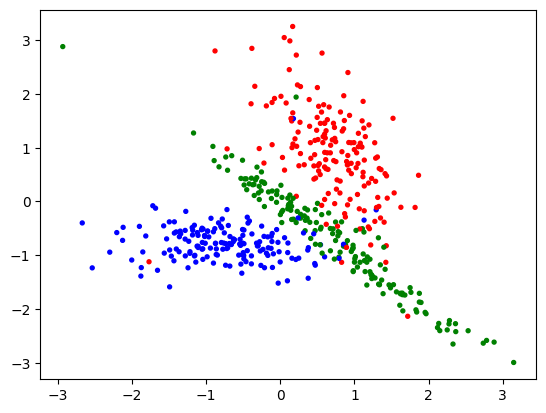

In [256]:
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['red', 'green', 'blue'])

X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_classes=3,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.8,
    random_state=1
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=8, cmap=cmap)

In [ ]:
minx, maxx = X.min()-2, X.max()+2

r = np.linspace(minx, maxx, 200)
xx, yy = np.meshgrid(r, r)
D = np.vstack([xx.ravel(), yy.ravel()]).T

_D = torch.from_numpy(D).to(torch.float)

_X = torch.from_numpy(X).to(torch.float)
_y = torch.from_numpy(y).to(torch.long)

### Tanh networks

#### Isotropic Tanh network

c:\Users\janba\anaconda3\envs\workspace_jan\Lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


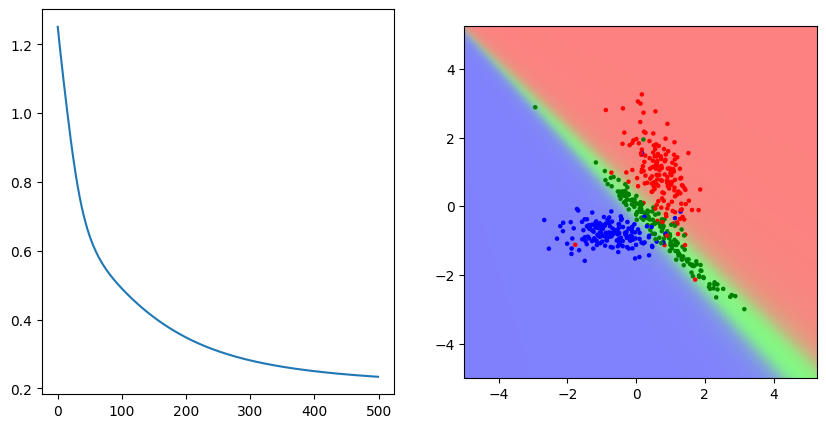

In [ ]:
net, iso_tanh_losses, iso_tanh_D_z, iso_tanh_D_preds, iso_tanh_y_z, iso_tanh_y_preds = train_network(
    iso=True,
    act='tanh',
    X=_X,
    y=_y,
    D=_D
)

rgb_image = iso_tanh_D_preds[-1].reshape(xx.shape[0], xx.shape[1], 3)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(iso_tanh_losses)
axes[1].imshow(rgb_image, extent=[xx.min(), xx.max(), yy.min(), yy.max()], origin='lower', alpha=0.5)
axes[1].scatter(X[:, 0], X[:, 1], c=y, s=5, cmap=cmap)

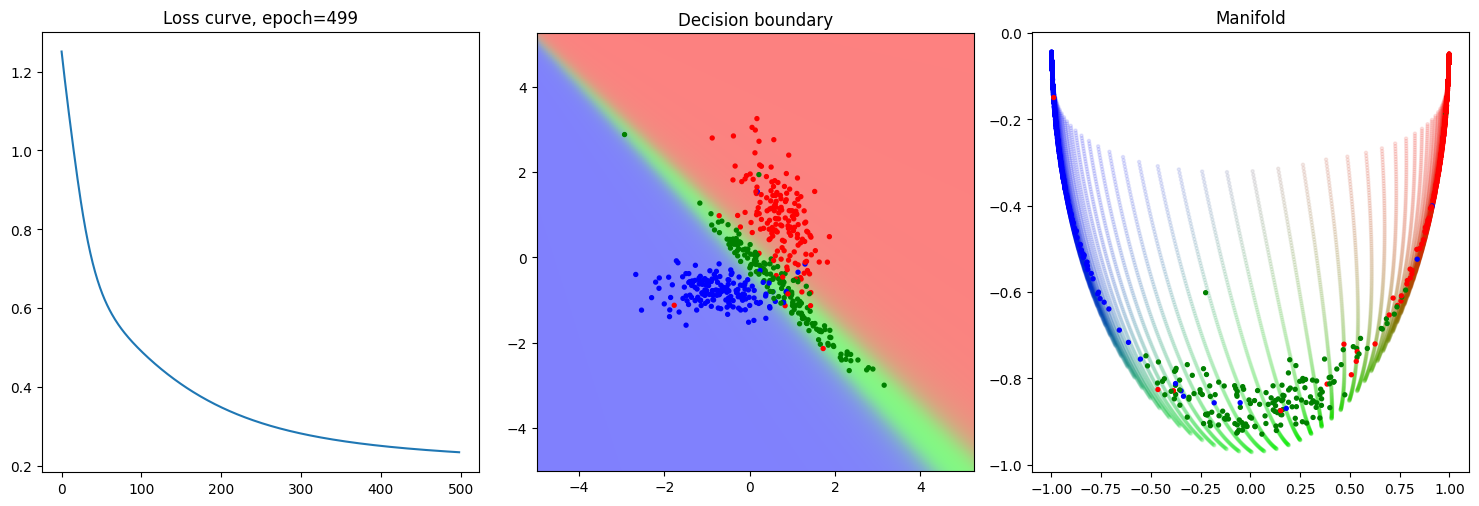

In [259]:
animate_multiclass_manifold(
    path='../datasets/multi_iso_tanh_training_animation.mp4',
    losses=iso_tanh_losses,
    X=X,
    y=y,
    xx=xx,
    yy=yy,
    D_preds=iso_tanh_D_preds,
    D_z=iso_tanh_D_z,
    y_preds=iso_tanh_y_preds,
    y_z=iso_tanh_y_z,
    cmap=cmap
)

#### Anisotropic Tanh network

c:\Users\janba\anaconda3\envs\workspace_jan\Lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


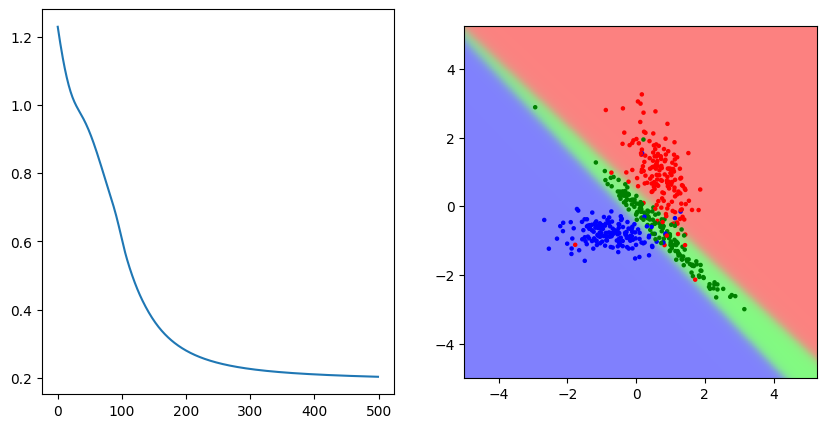

In [260]:
net, tanh_losses, tanh_D_z, tanh_D_preds,tanh_y_z, tanh_y_preds = train_network(
    iso=False,
    act='tanh',
    X=_X,
    y=_y,
    D=_D
)

rgb_image = tanh_D_preds[-1].reshape(xx.shape[0], xx.shape[1], 3)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(tanh_losses)
axes[1].imshow(rgb_image, extent=[xx.min(), xx.max(), yy.min(), yy.max()], origin='lower', alpha=0.5)
axes[1].scatter(X[:, 0], X[:, 1], c=y, s=5, cmap=cmap)

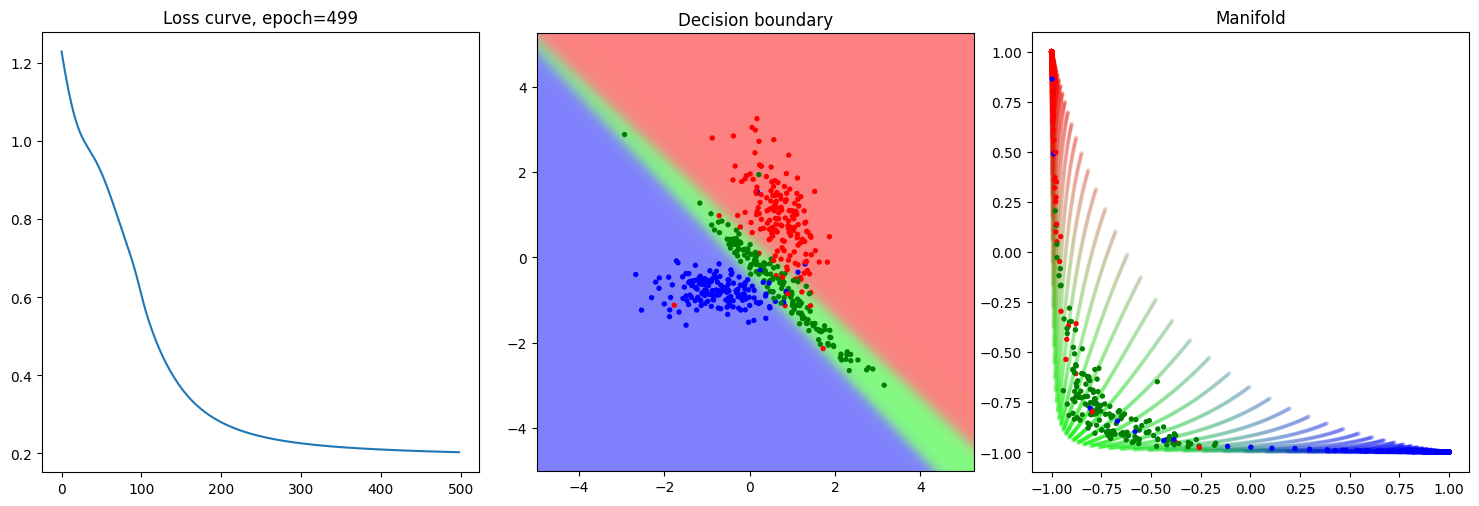

In [261]:
animate_multiclass_manifold(
    path='../datasets/multi_tanh_training_animation.mp4',
    losses=tanh_losses,
    X=X,
    y=y,
    xx=xx,
    yy=yy,
    D_preds=tanh_D_preds,
    D_z=tanh_D_z,
    y_preds=tanh_y_preds,
    y_z=tanh_y_z,
    cmap=cmap
)

#### Comparison of latent spaces

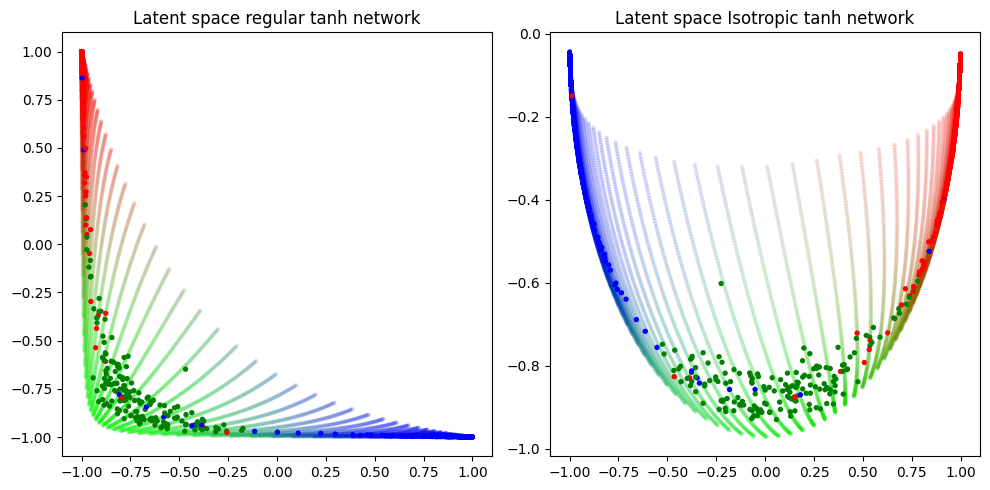

In [266]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(tanh_D_z[-1][:, 0], tanh_D_z[-1][:, 1], s=5, c=tanh_D_preds[-1], alpha=0.1)
ax1.scatter(tanh_y_z[-1][:, 0], tanh_y_z[-1][:, 1], s=8, c=y, cmap=cmap)
ax1.set_title('Latent space regular tanh network')

ax2.scatter(iso_tanh_D_z[-1][:, 0], iso_tanh_D_z[-1][:, 1], s=5, c=iso_tanh_D_preds[-1], alpha=0.1)
ax2.scatter(iso_tanh_y_z[-1][:, 0], iso_tanh_y_z[-1][:, 1], s=8, c=y, cmap=cmap)
ax2.set_title('Latent space Isotropic tanh network')

plt.tight_layout()

### Relu networks

#### Isotropic ReLU network

c:\Users\janba\anaconda3\envs\workspace_jan\Lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


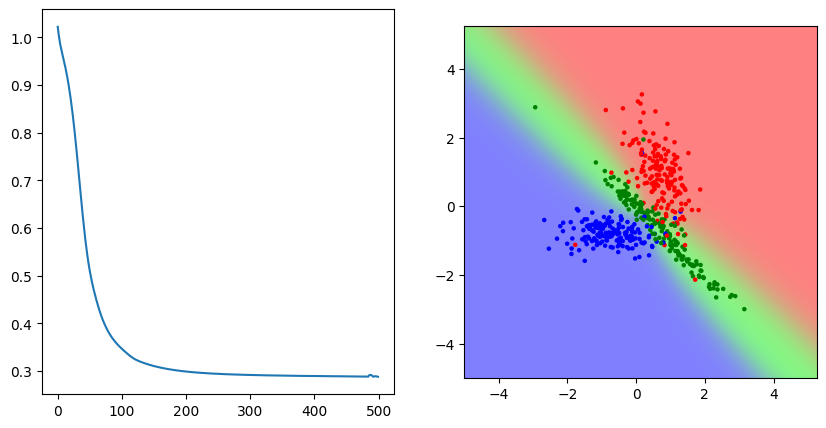

In [267]:
net, iso_relu_losses, iso_relu_D_z, iso_relu_D_preds, iso_relu_y_z, iso_relu_y_preds = train_network(
    iso=True,
    act='relu',
    X=_X,
    y=_y,
    D=_D
)

rgb_image = iso_relu_D_preds[-1].reshape(xx.shape[0], xx.shape[1], 3)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(iso_relu_losses)
axes[1].imshow(rgb_image, extent=[xx.min(), xx.max(), yy.min(), yy.max()], origin='lower', alpha=0.5)
axes[1].scatter(X[:, 0], X[:, 1], c=y, s=5, cmap=cmap)

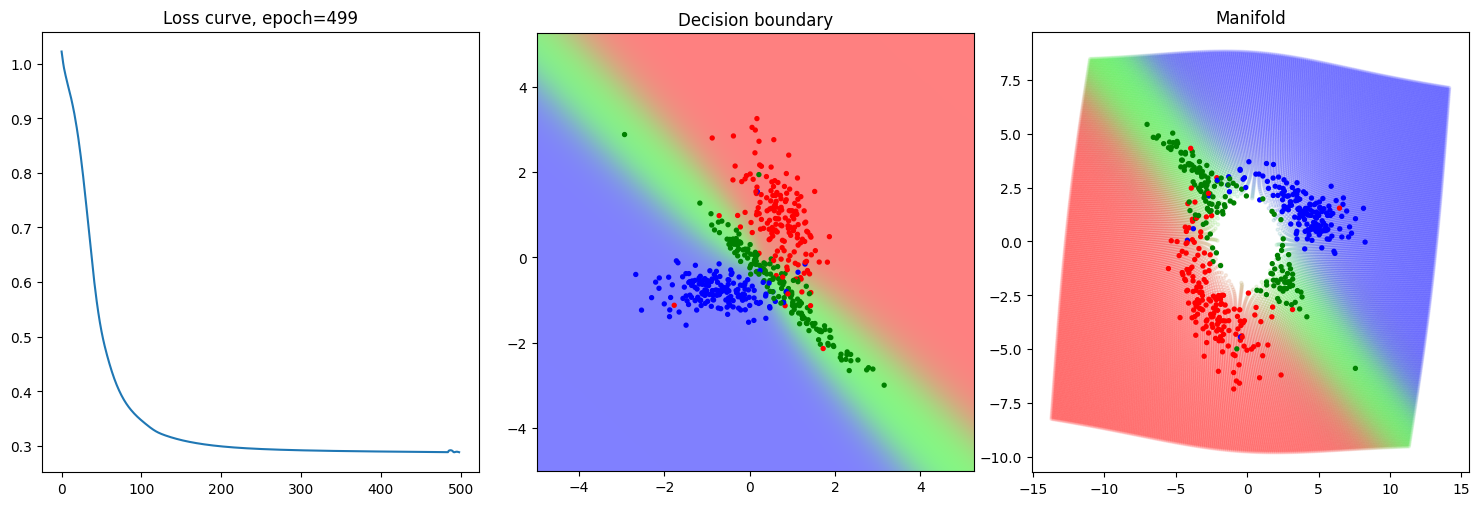

In [268]:
animate_multiclass_manifold(
    path='../datasets/multi_iso_relu_training_animation.mp4',
    losses=iso_relu_losses,
    X=X,
    y=y,
    xx=xx,
    yy=yy,
    D_preds=iso_relu_D_preds,
    D_z=iso_relu_D_z,
    y_preds=iso_relu_y_preds,
    y_z=iso_relu_y_z,
    cmap=cmap
)

#### Anisotropic ReLU network

c:\Users\janba\anaconda3\envs\workspace_jan\Lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


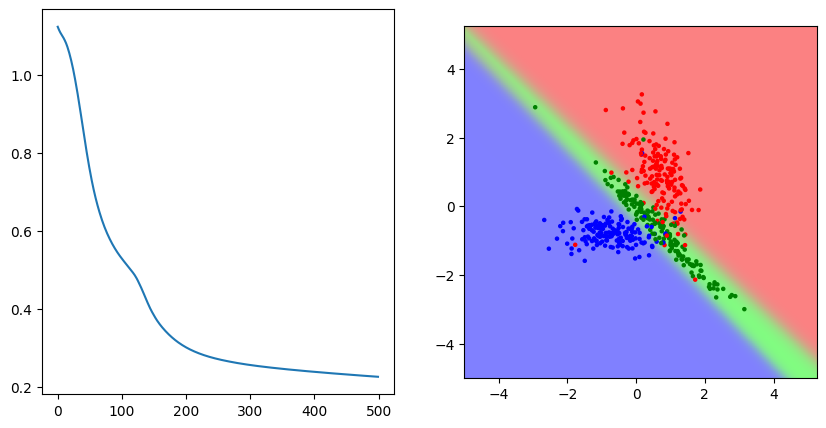

In [269]:
net, relu_losses, relu_D_z, relu_D_preds, relu_y_z, relu_y_preds = train_network(
    iso=False,
    act='relu',
    X=_X,
    y=_y,
    D=_D
)

rgb_image = relu_D_preds[-1].reshape(xx.shape[0], xx.shape[1], 3)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(relu_losses)
axes[1].imshow(rgb_image, extent=[xx.min(), xx.max(), yy.min(), yy.max()], origin='lower', alpha=0.5)
axes[1].scatter(X[:, 0], X[:, 1], c=y, s=5, cmap=cmap)

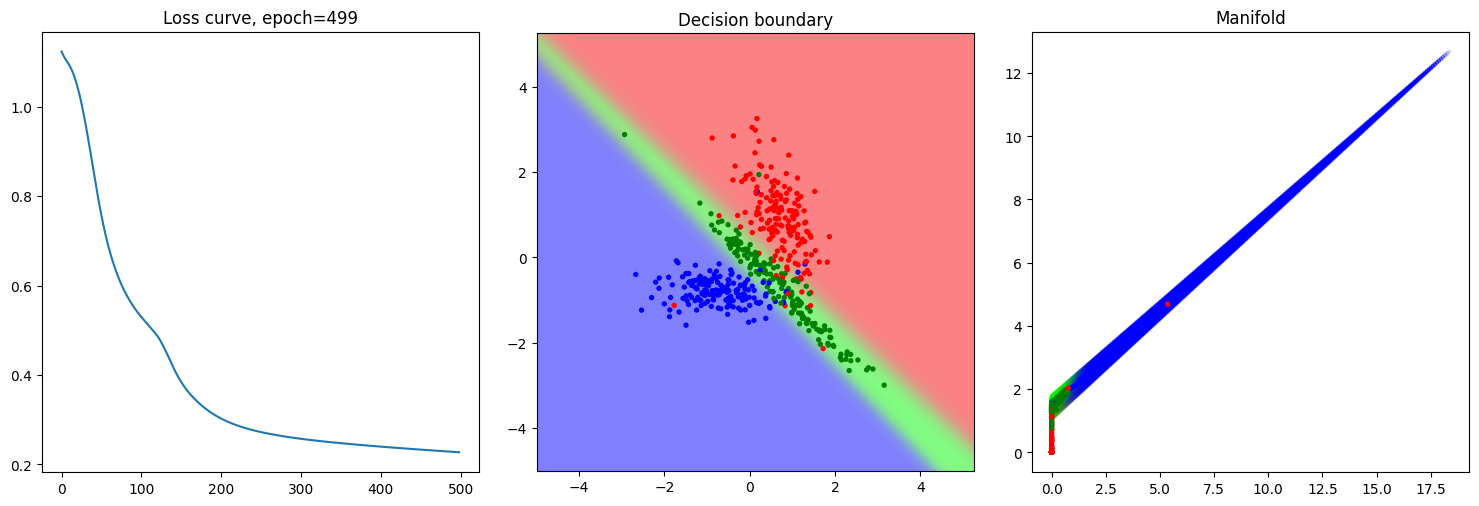

In [270]:
animate_multiclass_manifold(
    path='../datasets/multi_relu_training_animation.mp4',
    losses=relu_losses,
    X=X,
    y=y,
    xx=xx,
    yy=yy,
    D_preds=relu_D_preds,
    D_z=relu_D_z,
    y_preds=relu_y_preds,
    y_z=relu_y_z,
    cmap=cmap
)

#### Comparison of latent spaces

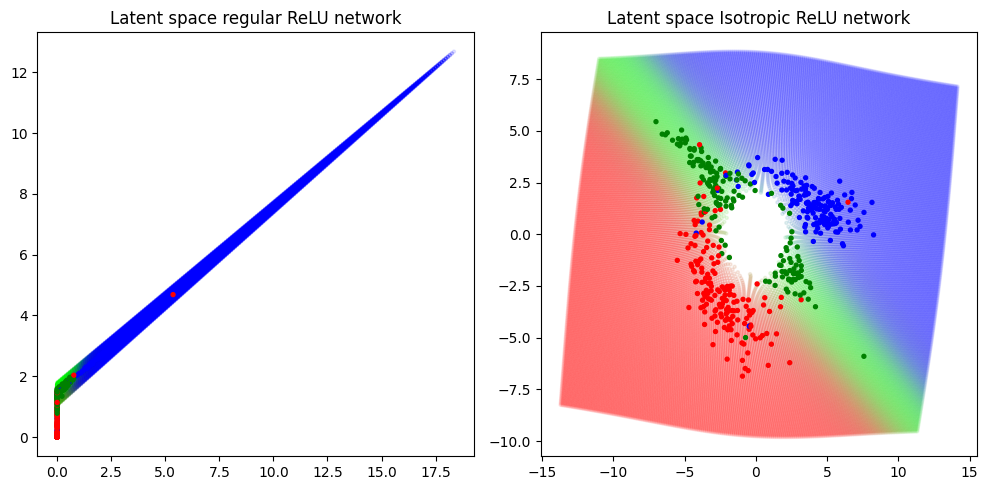

In [271]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(relu_D_z[-1][:, 0], relu_D_z[-1][:, 1], s=5, c=relu_D_preds[-1], alpha=0.1)
ax1.scatter(relu_y_z[-1][:, 0], relu_y_z[-1][:, 1], s=8, c=y, cmap=cmap)
ax1.set_title('Latent space regular ReLU network')

ax2.scatter(iso_relu_D_z[-1][:, 0], iso_relu_D_z[-1][:, 1], s=5, c=iso_relu_D_preds[-1], alpha=0.1)
ax2.scatter(iso_relu_y_z[-1][:, 0], iso_relu_y_z[-1][:, 1], s=8, c=y, cmap=cmap)
ax2.set_title('Latent space Isotropic ReLU network')

plt.tight_layout()

## MNIST Experiment

In [273]:
class IsoMNIST(nn.Module):
    
    def __init__(self, d, iso=True, act='tanh'):
        super().__init__()
        self.iso = iso
        self.act = act
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, d)
        self.fc3 = nn.Linear(d, 10)
        if self.act == 'relu':
            self.r0 = nn.Parameter(torch.tensor(0.0))
        
        self.z1 = torch.tensor(0)
        self.z2 = torch.tensor(0)
        
    def forward(self, x):
        # input x must have shape: (batch_size, 28*28)

        x = self.fc2(F.relu(self.fc1(x)))

        match (self.act, self.iso):
            case ('tanh', True):
                # isotropic tanh f(||x||) * x/||x||
                x_norm = torch.norm(x, p=2, dim=1, keepdim=True)
                self.z1 = F.tanh(x_norm) * (x / x_norm)
            case ('tanh', False):
                self.z1 = F.tanh(x)
            case ('relu', True):
                # isotropic relu f(||x|| - r0) * x/||x||
                x_norm = torch.norm(x, p=2, dim=1, keepdim=True)
                self.z1 = F.relu(x_norm - self.r0) * (x / x_norm)
            case ('relu', False):
                self.z1 = F.relu(x)

        self.z2 = self.fc3(self.z1)   
        return self.z2
    
x = torch.randn(32, 28*28)
iso_mnist = IsoMNIST(d=20, act='relu')
iso_mnist(x).shape

torch.Size([32, 10])

In [274]:
import torchvision
import torchvision.transforms as transforms

DOWNLOAD_PATH = '../datasets'

# normalize so that the mean of the data is zero and the variance is one
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) 
])

train_val = torchvision.datasets.MNIST(root=DOWNLOAD_PATH, train=True, download=True, transform=transform)
test = torchvision.datasets.MNIST(root=DOWNLOAD_PATH, train=False, download=True, transform=transform)
train, val = torch.utils.data.random_split(train_val, [55000, 5000])

len(train), len(val), len(test)

(55000, 5000, 10000)

In [275]:
from torch.utils.data import DataLoader

batch_size = 64
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test, batch_size=len(test), shuffle=True)
val_loader = DataLoader(val, batch_size=len(val), shuffle=True)

In [276]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [277]:
def train_MNIST(model, lr, epochs, verbose=False):
    
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr,)

    train_history = []
    val_history = []

    for e in range(epochs):
        batch_history = []
        # TRAIN STEP
        for images, labels in train_loader:
            # convert images to the correct device (GPU or CPU)
            images, labels = images.flatten(start_dim=1).to(device), labels.to(device)
            # predict and compute loss
            preds = model(images)
            preds.retain_grad()
            loss = F.nll_loss(torch.log_softmax(preds, dim=1), labels)
            batch_history.append(loss.item())

            # optimization step
            optimizer.zero_grad()
            loss.backward()
            
            optimizer.step()

        train_history.append(np.mean(batch_history))

        batch_history = []
        # VALIDATION STEP
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.flatten(start_dim=1).to(device), labels.to(device)
                preds = model(images)
                loss = F.nll_loss(torch.log_softmax(preds, dim=1), labels)
                batch_history.append(loss.item())
            val_history.append(np.mean(batch_history))
        
        if verbose: print(f"epoch: {e}\ttrain loss: {train_history[-1]:.4f}\tval loss: {val_history[-1]:.4f}")
    
    return train_history, val_history

def test_MNIST(model, test_loader):
    test_acc, test_loss = 0, 0
    # VALIDATION STEP
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.flatten(start_dim=1).to(device), labels.to(device)
            preds = model(images)
            loss = F.nll_loss(torch.log_softmax(preds, dim=1), labels)
            test_loss += loss.item()
            test_acc += sum(preds.argmax(dim=-1) == labels).item()

    print(f'test loss: {test_loss}\t test accuracy: {test_acc / len(test)}')

    return labels

### Tanh networks

In [278]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
EPOCHS = 10
learning_rate = 0.001
d = 2

iso_model = IsoMNIST(d=d, iso=True, act='tanh').to(device)
model = IsoMNIST(d=d, iso=False, act='tanh').to(device)

epoch: 0	train loss: 1.8216	val loss: 1.5506
epoch: 1	train loss: 1.4152	val loss: 1.3124
epoch: 2	train loss: 1.2426	val loss: 1.1990
epoch: 3	train loss: 1.1456	val loss: 1.1120
epoch: 4	train loss: 1.0720	val loss: 1.0588
epoch: 5	train loss: 1.0193	val loss: 1.0048
epoch: 6	train loss: 0.9686	val loss: 0.9692
epoch: 7	train loss: 0.9273	val loss: 0.9300
epoch: 8	train loss: 0.8917	val loss: 0.8940
epoch: 9	train loss: 0.8576	val loss: 0.8802


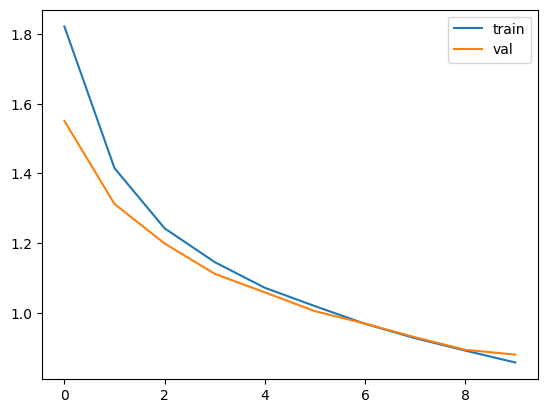

In [279]:
train_history, val_history = train_MNIST(iso_model, learning_rate, EPOCHS, verbose=True)

plt.plot(train_history, label='train')
plt.plot(val_history, label='val')
plt.legend()

In [280]:
iso_labels = test_MNIST(iso_model, test_loader)

test loss: 0.8776165843009949	 test accuracy: 0.8036


epoch: 0	train loss: 1.6606	val loss: 1.4756
epoch: 1	train loss: 1.3695	val loss: 1.3277
epoch: 2	train loss: 1.2735	val loss: 1.2635
epoch: 3	train loss: 1.2217	val loss: 1.2237
epoch: 4	train loss: 1.1907	val loss: 1.1975
epoch: 5	train loss: 1.1608	val loss: 1.1773
epoch: 6	train loss: 1.1168	val loss: 1.1235
epoch: 7	train loss: 1.0712	val loss: 1.1107
epoch: 8	train loss: 1.0310	val loss: 1.0662
epoch: 9	train loss: 0.9976	val loss: 1.0050


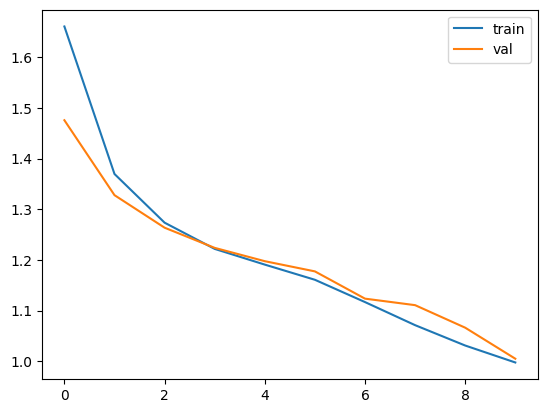

In [281]:
train_history, val_history = train_MNIST(model, learning_rate, EPOCHS, verbose=True)

plt.plot(train_history, label='train')
plt.plot(val_history, label='val')
plt.legend()

In [282]:
labels = test_MNIST(model, test_loader)

test loss: 1.0123509168624878	 test accuracy: 0.6208


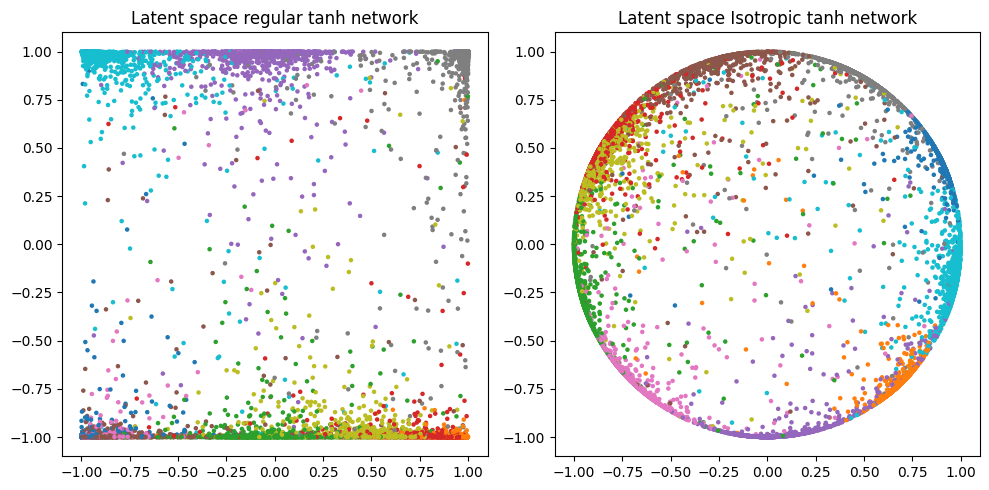

In [283]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

z1 = model.z1.detach().cpu().numpy()

ax1.scatter(z1[:, 0], z1[:, 1], s=5, c=labels.cpu().numpy(), cmap='tab10')
ax1.set_title('Latent space regular tanh network')

z1 = iso_model.z1.detach().cpu().numpy()

ax2.scatter(z1[:, 0], z1[:, 1], s=5, c=iso_labels.cpu().numpy(), cmap='tab10')
ax2.set_title('Latent space Isotropic tanh network')

plt.tight_layout()

### Relu networks

In [284]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
EPOCHS = 10
learning_rate = 0.001
d = 2

iso_model = IsoMNIST(d=d, iso=True, act='relu').to(device)
model = IsoMNIST(d=d, iso=False, act='relu').to(device)

epoch: 0	train loss: 1.2155	val loss: 0.8800
epoch: 1	train loss: 0.7730	val loss: 0.6576
epoch: 2	train loss: 0.6007	val loss: 0.5579
epoch: 3	train loss: 0.5054	val loss: 0.4917
epoch: 4	train loss: 0.4457	val loss: 0.4206
epoch: 5	train loss: 0.4026	val loss: 0.4045
epoch: 6	train loss: 0.3694	val loss: 0.3627
epoch: 7	train loss: 0.3470	val loss: 0.3508
epoch: 8	train loss: 0.3261	val loss: 0.3502
epoch: 9	train loss: 0.3107	val loss: 0.3258


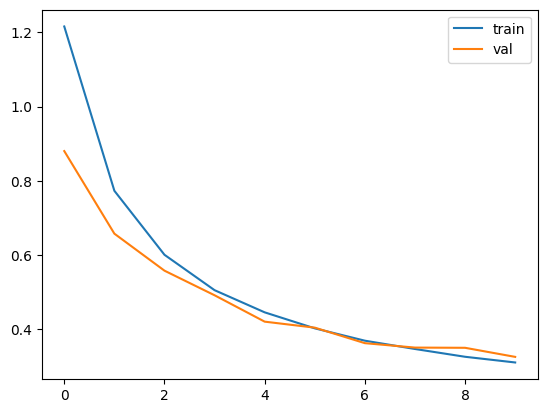

In [285]:
train_history, val_history = train_MNIST(iso_model, learning_rate, EPOCHS, verbose=True)

plt.plot(train_history, label='train')
plt.plot(val_history, label='val')
plt.legend()

In [286]:
iso_labels = test_MNIST(iso_model, test_loader)

test loss: 0.3220154941082001	 test accuracy: 0.9183


In [287]:
model = IsoMNIST(d=d, iso=False, act='relu').to(device)

epoch: 0	train loss: 1.6003	val loss: 1.1372
epoch: 1	train loss: 0.9902	val loss: 0.9009
epoch: 2	train loss: 0.8094	val loss: 0.7562
epoch: 3	train loss: 0.6916	val loss: 0.6501
epoch: 4	train loss: 0.6007	val loss: 0.5929
epoch: 5	train loss: 0.5469	val loss: 0.5485
epoch: 6	train loss: 0.5059	val loss: 0.5348
epoch: 7	train loss: 0.4759	val loss: 0.5046
epoch: 8	train loss: 0.4514	val loss: 0.4795
epoch: 9	train loss: 0.4315	val loss: 0.4708


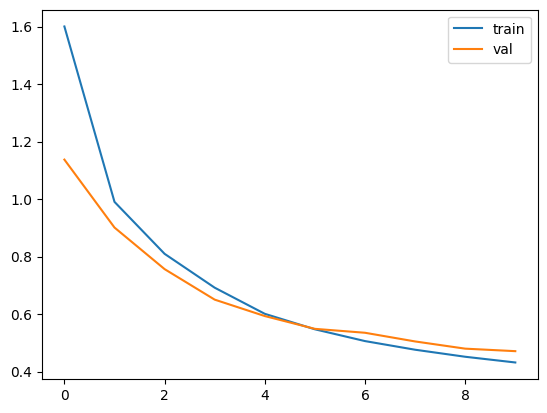

In [288]:
train_history, val_history = train_MNIST(model, learning_rate, EPOCHS, verbose=True)

plt.plot(train_history, label='train')
plt.plot(val_history, label='val')
plt.legend()

In [289]:
labels = test_MNIST(model, test_loader)

test loss: 0.46786263585090637	 test accuracy: 0.8886


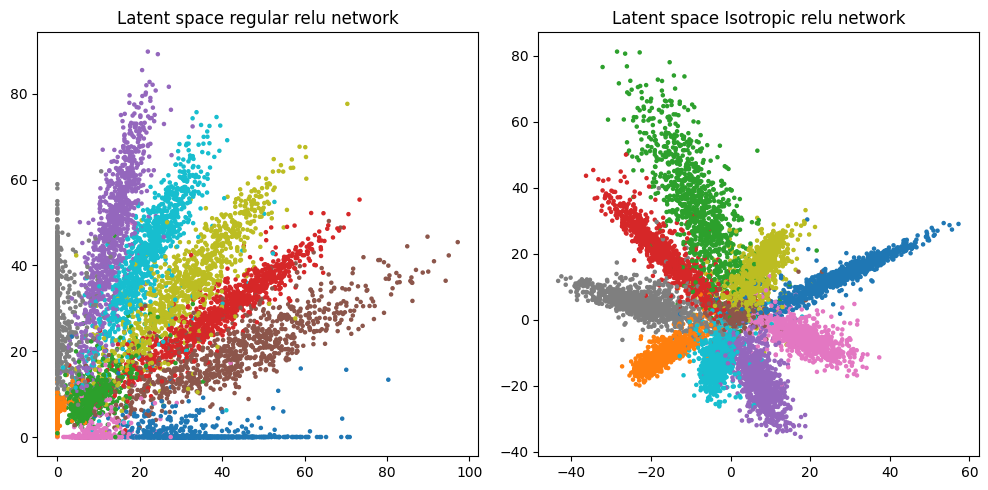

In [290]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

z1 = model.z1.detach().cpu().numpy()

ax1.scatter(z1[:, 0], z1[:, 1], s=5, c=labels.cpu().numpy(), cmap='tab10')
ax1.set_title('Latent space regular relu network')

z1 = iso_model.z1.detach().cpu().numpy()

ax2.scatter(z1[:, 0], z1[:, 1], s=5, c=iso_labels.cpu().numpy(), cmap='tab10')
ax2.set_title('Latent space Isotropic relu network')

plt.tight_layout()